In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy.stats import norm

# Data processing

## import data

In [2]:
data = pd.read_csv("test_table.csv")
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [3]:
use_info = pd.read_csv("user_table.csv")
use_info.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


## Merge data

In [4]:
data = pd.merge(data,use_info[['user_id', 'country']], how='left', on='user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,Mexico


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 453320
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           452867 non-null  int64 
 1   date              452867 non-null  object
 2   source            452867 non-null  object
 3   device            452867 non-null  object
 4   browser_language  452867 non-null  object
 5   ads_channel       181693 non-null  object
 6   browser           452867 non-null  object
 7   conversion        452867 non-null  int64 
 8   test              452867 non-null  int64 
 9   country           452867 non-null  object
 10  country_new       452867 non-null  object
dtypes: int64(3), object(8)
memory usage: 57.6+ MB


## Check missing value

In [5]:
data.isnull().mean() *100

user_id              0.000000
date                 0.000000
source               0.000000
device               0.000000
browser_language     0.000000
ads_channel         59.878982
browser              0.000000
conversion           0.000000
test                 0.000000
country              0.100150
dtype: float64

In [6]:
data[data['country'].isnull()]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,country
819,657841,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,NaN
1696,859340,2015-12-04,Direct,Mobile,EN,NaN,Android_App,0,0,NaN
1934,716487,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,0,NaN
2409,87209,2015-12-01,Direct,Web,ES,NaN,Chrome,0,0,NaN
2721,771642,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
446681,490883,2015-12-01,Direct,Mobile,EN,NaN,Android_App,0,1,NaN
451052,741971,2015-11-30,SEO,Web,ES,NaN,Chrome,0,1,NaN
452302,722387,2015-11-30,SEO,Web,ES,NaN,FireFox,0,1,NaN
452342,752632,2015-12-04,Ads,Web,ES,Google,IE,0,1,NaN


In [7]:
# as column 'country' only contains 0.1% missing value, dropping them is acceptable.
# conlumn 'ads_channel' is irrelevant, just ignore it.
data.dropna(subset=['country'], inplace=True)
data.isnull().mean()

user_id             0.000000
date                0.000000
source              0.000000
device              0.000000
browser_language    0.000000
ads_channel         0.598794
browser             0.000000
conversion          0.000000
test                0.000000
country             0.000000
dtype: float64

## Add new country column (only 'Spain' and 'Other')

In [8]:
data['country_new'] = 'Spain'
data['country_new'][data['country'] != 'Spain'] = 'Other'
data['country_new'].value_counts()

C:\Users\CT\AppData\Local\Temp/ipykernel_20680/537532045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country_new'][data['country'] != 'Spain'] = 'Other'


Other    401085
Spain     51782
Name: country_new, dtype: int64

## Drop useless columns

In [9]:
columns = ['user_id', 'date', 'browser_language','conversion', 'test', 'country','country_new']
data_test = data[columns]
data_test

,user_id,date,browser_language,conversion,test,country,country_new
0,315281,2015-12-03,ES,1,0,Spain,Spain
1,497851,2015-12-04,ES,0,1,Mexico,Other
2,848402,2015-12-04,ES,0,0,Spain,Spain
3,290051,2015-12-03,Other,0,1,Mexico,Other
4,548435,2015-11-30,ES,0,1,Mexico,Other
...,...,...,...,...,...,...,...
453316,425010,2015-12-04,ES,0,0,Mexico,Other
453317,826793,2015-12-01,ES,0,1,Colombia,Other
453318,514870,2015-12-02,ES,0,0,Spain,Spain
453319,785224,2015-12-04,ES,0,1,Colombia,Other


## Check if all Spain-based users are assigned to control group

In [10]:
data_test[data_test['country_new'] == 'Spain']['test'].value_counts()

0    51782
Name: test, dtype: int64

# Data Overview

In [11]:
data_test

,user_id,date,browser_language,conversion,test,country,country_new
0,315281,2015-12-03,ES,1,0,Spain,Spain
1,497851,2015-12-04,ES,0,1,Mexico,Other
2,848402,2015-12-04,ES,0,0,Spain,Spain
3,290051,2015-12-03,Other,0,1,Mexico,Other
4,548435,2015-11-30,ES,0,1,Mexico,Other
...,...,...,...,...,...,...,...
453316,425010,2015-12-04,ES,0,0,Mexico,Other
453317,826793,2015-12-01,ES,0,1,Colombia,Other
453318,514870,2015-12-02,ES,0,0,Spain,Spain
453319,785224,2015-12-04,ES,0,1,Colombia,Other


## Barplot - country vs browser_language
#####  
#####  1.most users choose Spanish as their browser language. There may be the season why the test result is negative.

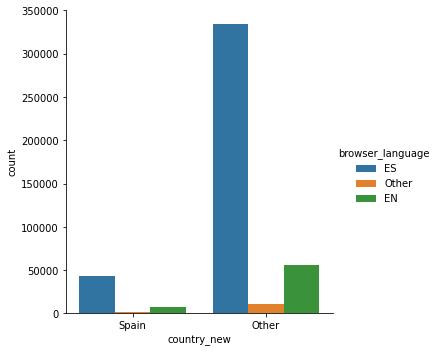

In [12]:
sns.catplot(x="country_new", hue='browser_language', kind="count", data=data_test)

## Barplot - country vs test
#####  
#####  1. Spain users are all in control group. It coincides with experiment.
#####  2. Numbers of other country users in different group are slightly different. It should be tested whether it is within the confidence internal .

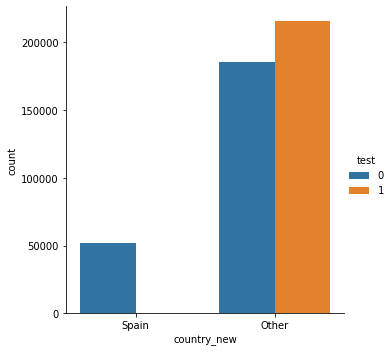

In [13]:
sns.catplot(x="country_new", hue='test', kind="count", data=data_test)

## Barplot - browser_language vs test
#####   
#####  1. numbers of different browser language users in the two groups separately should be test whether within CI should be tested as well.

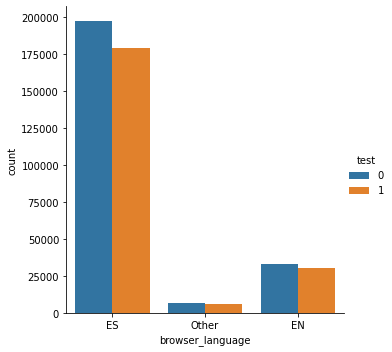

In [14]:
sns.catplot(x="browser_language", hue='test', kind="count", data=data_test)

## Barplot - country & browser_language vs test
#####   
##### 1. There seems inbalanced numbers of  users of different subtypes in the two group. It should be test.

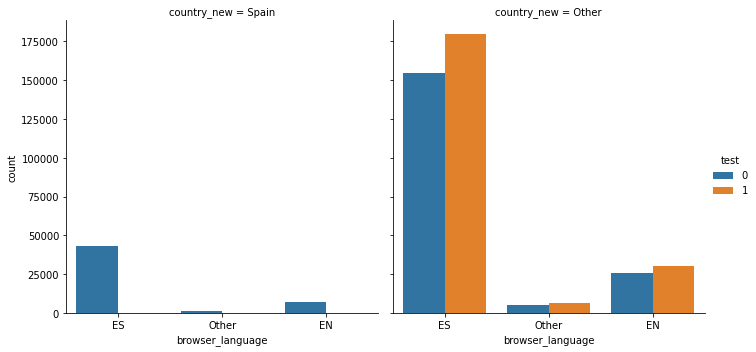

In [15]:
sns.catplot(col="country_new", x = 'browser_language', hue='test', kind="count", data=data_test)

# Devide control and experiment data

In [55]:
data_ctl = data_test[(data_test['country_new'] != 'Spain') & (data_test['test'] == 0)]
conversion_rate = round(data_ctl['conversion'].mean(), 4)
count = len(data_ctl)
control = {'conversion': conversion_rate, 'sample_size': count}
print("Control Group")
control

Control Group


{'conversion': 0.0483, 'sample_size': 185311}

In [56]:
data_exp = data_test[(data_test['country_new'] != 'Spain') & (data_test['test'] != 0)]
conversion_rate = round(data_exp['conversion'].mean(), 4)
count = len(data_exp)
experiment = {'conversion': conversion_rate, 'sample_size': count}
print("Experiment Group")
experiment

Experiment Group


{'conversion': 0.0434, 'sample_size': 215774}

# Set baseline  & MDE

In [33]:
data_baseline = data_test[data_test['country_new'] == 'Spain']
baseline = {'conversion' : control['conversion'], 'MDE': 0.01}

# Calculate sample size

In [27]:
from IPython.display import IFrame
IFrame('https://www.evanmiller.org/ab-testing/sample-size.html#!4.83;80;5;1;0', width=800, height=500)

In [34]:
# From the above sample size calculator, we can get the sample size is:
sample_size = 7423
baseline['Sample_zise'] = sample_size
print("Baseline")
baseline

Baseline


{'conversion': 0.0483, 'MDE': 0.01, 'Sample_zise': 7423}

# Check Sample Distribution Assumption

## Whether user distributionin different group follow Bi (n, 0.5)

In [36]:
data_full = data_test[(data_test['country_new'] != 'Spain')]
data_full['test'].mean()

0.5379757408030716

In [49]:
def bi_check(n, p_sample, p = 0.5, alpha = 0.05):
    sd = mt.sqrt(p*(1-p) / n)
    ME = round(norm.ppf(1 - (alpha/2)) * sd, 4)
    CI = np.array([p-ME, p+ME])
    if p_sample >= CI[0] and p_sample <= CI[1]:
        print("It follows Bi(", n, ", ", p, ")")
    else:
        print("It does not follow Bi(", n, ", ", p, ")")
        
        
bi_check(len(data_full['test']), data_full['test'].mean())
        
    

It does not follow Bi( 401085 ,  0.5 )


# Conversion Rate Test

In [63]:
d_hat = round(experiment['conversion'] - control['conversion'], 4)
p_pooled = data_full['conversion'].mean()
sd_pooled = mt.sqrt(p_pooled * (1-p_pooled) * (1/control['sample_size'] + 1/experiment['sample_size']))
ME=round(norm.ppf(1-(0.05/2))*sd_pooled,4)
print ("Confidence Interval is： ",d_hat-ME,"，",d_hat+ME,", sample result is: ",d_hat)

Confidence Interval is：  -0.0062 ， -0.0036 , sample result is:  -0.0049


# By Country

In [77]:
group_ctl = data_ctl.groupby('country')
control_country = group_ctl['conversion'].agg([np.mean, np.size])
control_country.columns = ['conversion', 'size']
print("Control Group")
control_country

Control Group


,conversion,size
country,,
Argentina,0.015071,9356
Bolivia,0.049369,5550
Chile,0.048107,9853
Colombia,0.052089,27088
Costa Rica,0.052256,2660
Ecuador,0.049154,8036
El Salvador,0.053554,4108
Guatemala,0.050643,7622
Honduras,0.050906,4361


In [78]:
group_exp = data_exp.groupby('country')
experiment_country = group_exp['conversion'].agg([np.mean, np.size])
experiment_country.columns = ['conversion', 'size']
print("Experiment Group")
experiment_country

Experiment Group


,conversion,size
country,,
Argentina,0.013725,37377
Bolivia,0.047901,5574
Chile,0.051295,9884
Colombia,0.050571,26972
Costa Rica,0.054738,2649
Ecuador,0.048988,7859
El Salvador,0.047947,4067
Guatemala,0.048647,7503
Honduras,0.047540,4207


In [92]:
result = pd.DataFrame(experiment_country['conversion'] - control_country['conversion'])
result.columns = ['d_hat']

In [100]:
def CI_reslt (country, cov_exp, cov_ctl, size_exp, size_ctl, alpha=0.05):
    d_hat = round(cov_exp - cov_ctl, 4)
    p_pooled = (cov_exp*size_exp + cov_ctl*size_ctl) / (size_exp+size_ctl)
    sd_pooled = mt.sqrt(p_pooled * (1-p_pooled) * (1/size_exp + 1/size_ctl))
    ME=round(norm.ppf(1-(0.05/2))*sd_pooled,4)
    result.loc[country, 'CI_L'] = d_hat-ME
    result.loc[country, 'CI_H'] = d_hat+ME
    if d_hat-ME > 0:
        result.loc[country, 'result'] = '+'
    elif d_hat+ME < 0:
        result.loc[country, 'result'] = '-'
    else:
        result.loc[country, 'result'] = '0'

In [101]:
for country in result.index:
    cov_exp = experiment_country.loc[country, 'conversion']
    cov_ctl = control_country.loc[country, 'conversion']
    size_exp = experiment_country.loc[country, 'size']
    size_ctl = control_country.loc[country, 'size']
    CI_reslt (country, cov_exp, cov_ctl, size_exp, size_ctl)
    
result

,d_hat,CI_L,CI_H,result
country,,,,
Argentina,-0.001346,-0.0040,0.0014,0
Bolivia,-0.001468,-0.0095,0.0065,0
Chile,0.003188,-0.0029,0.0093,0
Colombia,-0.001519,-0.0052,0.0022,0
Costa Rica,0.002482,-0.0096,0.0146,0
Ecuador,-0.000165,-0.0069,0.0065,0
El Salvador,-0.005607,-0.0151,0.0039,0
Guatemala,-0.001996,-0.0089,0.0049,0
Honduras,-0.003366,-0.0126,0.0058,0


# To-do
##### 1.  Anayse conversion rate by day. (whenever results appear to good or too bad te be true, thet are not true)
##### 2. Build a desirion tree to see whether users in cntrol and test group are the same. (If same, decision tree can not slipt them.)